In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv("/content/Salary_Data.csv")
X = ds["YearsExperience"].values
Y = ds["Salary"].values

In [3]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [4]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

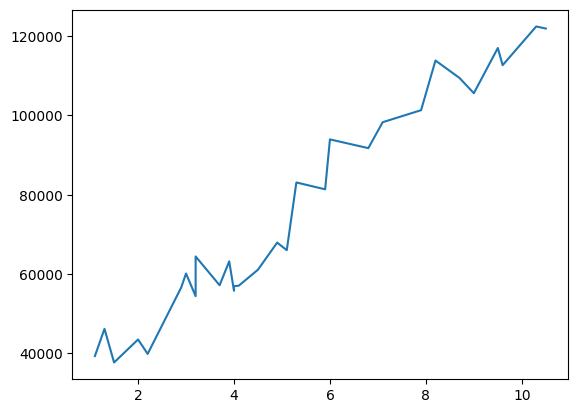

In [5]:
plt.plot(X,Y)

In [6]:
X = np.array(X)
Y = np.array(Y)

In [7]:
def mean(X):
  return np.sum(X)/len(X)

In [8]:
def variance(X):
  mean_value = mean(X)
  return np.sum((X-mean_value)**2)/len(X)

In [9]:
def norm(X):
  mean_value = mean(X)
  variance_value = variance(X)
  return (X - mean_value)/np.sqrt(variance_value)

In [10]:
X_norm = norm(X)

In [11]:
X_norm

array([-1.51005294, -1.43837321, -1.36669348, -1.18749416, -1.11581443,
       -0.86493538, -0.82909552, -0.75741579, -0.75741579, -0.57821647,
       -0.50653674, -0.47069688, -0.47069688, -0.43485702, -0.29149756,
       -0.1481381 , -0.07645838, -0.00477865,  0.21026054,  0.2461004 ,
        0.53281931,  0.6403389 ,  0.92705781,  1.03457741,  1.21377673,
        1.32129632,  1.50049564,  1.5363355 ,  1.78721455,  1.85889428])

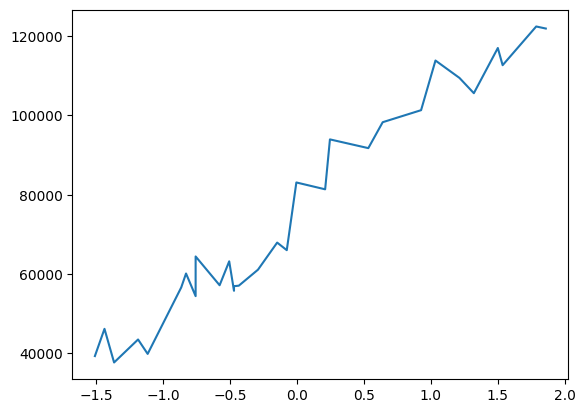

In [12]:
plt.plot(X_norm, Y)

In [13]:
import random

In [14]:
class SimpleLR:
  def __init__(self, lr=0.1, max_iter=2000, threshold=1e-6):
    self.lr = lr
    self.max_iter = max_iter
    self.threshold = threshold
    self.weight = random.uniform(-1,1)
    self.bias = random.uniform(-1,1)
  def predict(self, X):
    return self.weight * X + self.bias
  def fit(self, X, Y):
    n = len(X)
    loss_history = []
    y_pred = self.predict(X)
    errors = Y-y_pred
    prev_loss = (1/2*n) * np.sum(errors**2)
    for i in range(self.max_iter):
      w_grad = (1/n) * np.sum(errors*X)
      b_grad = (1/n) * np.sum(errors)
      self.weight += self.lr * w_grad
      self.bias += self.lr * b_grad
      y_pred = self.predict(X)
      errors = Y-y_pred
      curr_loss = (1/(2*n)) * np.sum(errors**2)
      if np.abs(curr_loss - prev_loss) < self.threshold:
        break
      prev_loss = curr_loss
      loss_history.append(curr_loss)
    return loss_history
  def plot(self, X, Y):
    y_pred = self.predict(X)
    plt.plot(X, Y)
    plt.plot(X, y_pred)

In [15]:
model = SimpleLR()

In [16]:
loss_history = model.fit(X_norm, Y)

In [17]:
loss_history

[np.float64(2636639098.5499296),
 np.float64(2138648410.2390604),
 np.float64(1735275952.7072556),
 np.float64(1408544262.1064937),
 np.float64(1143891592.7198768),
 np.float64(929522930.5167166),
 np.float64(755884314.1321573),
 np.float64(615237034.8606642),
 np.float64(501312738.6507548),
 np.float64(409034058.7207281),
 np.float64(334288327.9774063),
 np.float64(273744286.0753157),
 np.float64(224703612.1346225),
 np.float64(184980666.24266094),
 np.float64(152805080.07017198),
 np.float64(126742855.27045605),
 np.float64(105632453.18268608),
 np.float64(88533027.49159245),
 np.float64(74682492.68180655),
 np.float64(63463559.48588),
 np.float64(54376223.59717944),
 np.float64(47015481.52733204),
 np.float64(41053280.45075568),
 np.float64(36223897.57872878),
 np.float64(32312097.452386998),
 np.float64(29143539.35005012),
 np.float64(26577007.28715728),
 np.float64(24498116.316214073),
 np.float64(22814214.62975011),
 np.float64(21450254.26371427),
 np.float64(20345446.367225233),

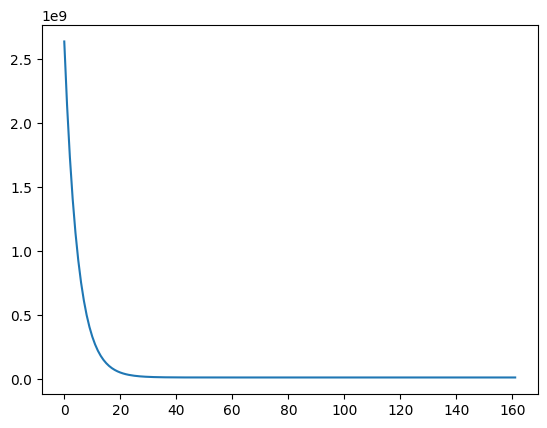

In [18]:
plt.plot(loss_history)

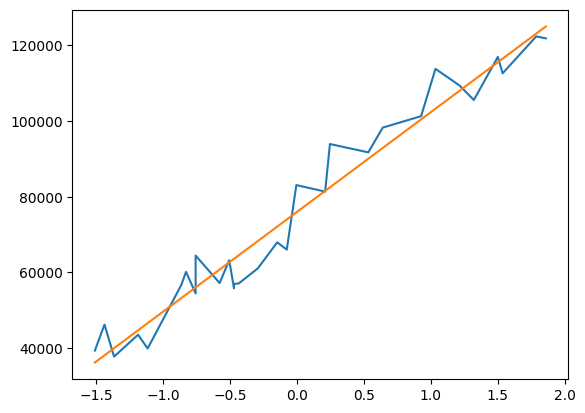

In [19]:
model.plot(X_norm, Y)